## Implemenatation of ANN Using Keras

In [3]:
## Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [4]:
## Checking versions of tensorflow and keras
print("Tensorflow version",tf.__version__)
print("Keras Version",tf.keras.__version__)

Tensorflow version 2.20.0
Keras Version 3.12.0


In [5]:
os.getcwd()

'c:\\Users\\abhishek.anand\\Desktop\\self\\Data_science\\Deep_Learning'

## Creating a simple classifier using keras on MNIST data

In [6]:
mnist  = tf.keras.datasets.mnist

In [7]:
mnist

<module 'keras.datasets.mnist' from 'C:\\Users\\abhishek.anand\\AppData\\Roaming\\Python\\Python313\\site-packages\\keras\\datasets\\mnist\\__init__.py'>

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [14]:
X_train_full[0].shape

(28, 28)

In [15]:
## Create a  validation data set from the full training data 
## Scale the data between 0 and 1 by dividing by 255, as its an unsigned data between 0-255 range

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


## scale the test set as well
X_test = X_test / 255.0

In [17]:
len(X_train_full[5000:] )

55000

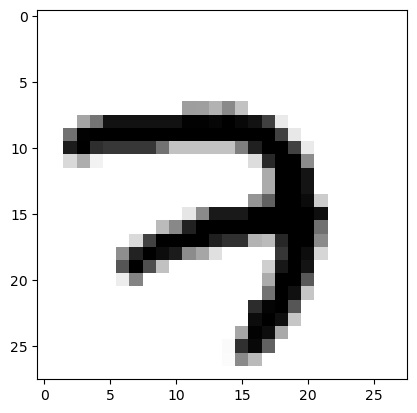

In [18]:
# Lets view some data

plt.imshow(X_train[0],cmap="binary")
plt.show()

<Axes: >

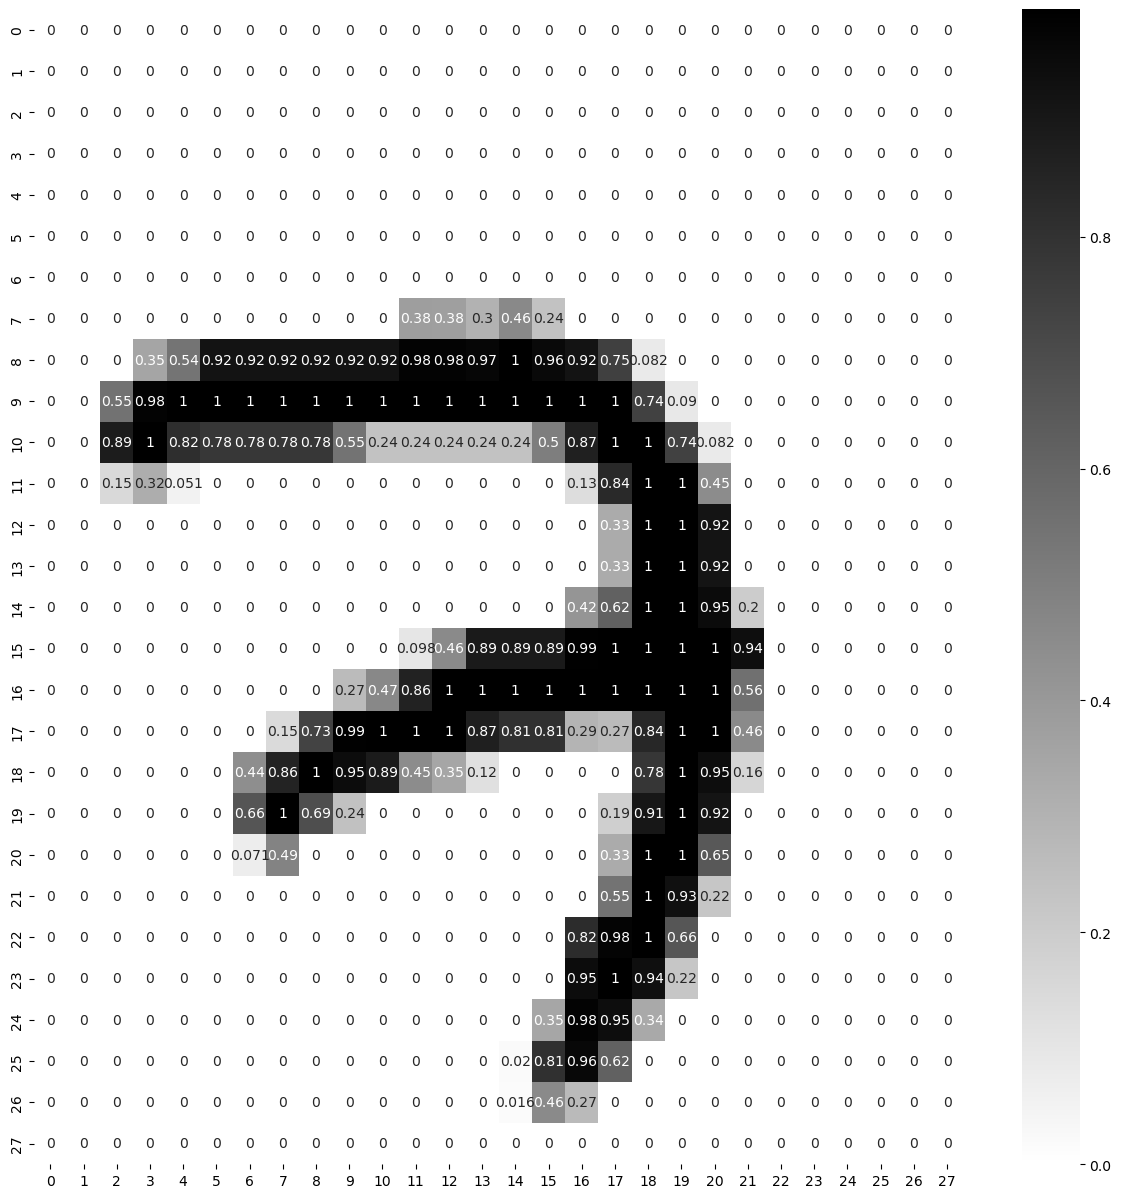

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

## Architecture USED : 

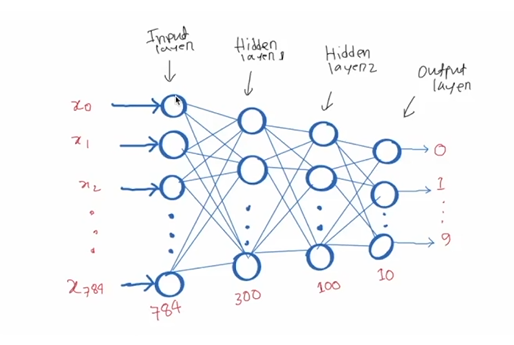

In [20]:
## Creating Layers of ANN
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name = "inputLayer"),
    tf.keras.layers.Dense(300,activation="relu", name = "hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu", name = "hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax", name = "outputLayer")
]

model_clf = tf.keras.models.Sequential(LAYERS)

C:\Users\abhishek.anand\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
## Method 2 

In [22]:
# from keras.models import Sequential
# from keras.layers import Dense, Flatten

# ## define the model
# model = Sequential()
# model.add(Dense(units = 64, activation='relu', input_shape=100))
# model.add(Dense(units = 10, activation='softmax'))

In [23]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [24]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# firstlayer * secondLayer + bias
784*300 + 300, 300*100 + 100, 100*10 + 10

(235500, 30100, 1010)

In [26]:
# Total Parameters to be trained 
sum((235500, 30100, 1010))

266610

In [28]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [31]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
hidden1.get_weights()[1].shape # bias

(300,)

In [33]:
hidden1.get_weights()

[array([[ 0.00998922,  0.04646134, -0.04977052, ..., -0.00621013,
         -0.03503215, -0.02205002],
        [ 0.06633861,  0.04369846, -0.07022417, ..., -0.02306547,
          0.06921671, -0.01425288],
        [ 0.00805181, -0.05204932,  0.06365709, ..., -0.07368361,
         -0.02378245,  0.02665946],
        ...,
        [ 0.04205006, -0.07381395,  0.06720726, ...,  0.01311664,
          0.00707141, -0.00094871],
        [ 0.06182615, -0.01612238, -0.02236451, ..., -0.01106127,
          0.02932298, -0.02004331],
        [-0.05409742, -0.02767536, -0.02674221, ..., -0.01832028,
          0.06977397,  0.0508973 ]], shape=(784, 300), dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 

In [35]:
weights , biases = hidden1.get_weights()

In [36]:
print("shape\n",biases.shape)

shape
 (300,)


In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                    optimizer=OPTIMIZER,
                    metrics=METRICS)


In [39]:
# training

Epochs = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf .fit(X_train, y_train, epochs=Epochs, validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8449 - loss: 0.6016 - val_accuracy: 0.9182 - val_loss: 0.3053
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9205 - loss: 0.2806 - val_accuracy: 0.9328 - val_loss: 0.2399
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9342 - loss: 0.2276 - val_accuracy: 0.9430 - val_loss: 0.2001
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9451 - loss: 0.1939 - val_accuracy: 0.9540 - val_loss: 0.1725
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9513 - loss: 0.1688 - val_accuracy: 0.9584 - val_loss: 0.1573
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9569 - loss: 0.1495 - val_accuracy: 0.9630 - val_loss: 0.1405
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9619 - loss: 0.1342 - val_accuracy: 0.9660 - val_loss: 0.1272
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9657 - loss: 0.1213 - 

In [40]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [41]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.844945,0.601633,0.9182,0.305350
1,0.920545,0.280605,0.9328,0.239934
2,0.934200,0.227568,0.9430,0.200076
3,0.945073,0.193873,0.9540,0.172514
4,0.951309,0.168793,0.9584,0.157260
5,0.956873,0.149509,0.9630,0.140454
6,0.961927,0.134157,0.9660,0.127172
7,0.965655,0.121348,0.9690,0.119244
8,0.968873,0.110543,0.9692,0.111496
9,0.971964,0.101360,0.9710,0.105410


<Axes: >

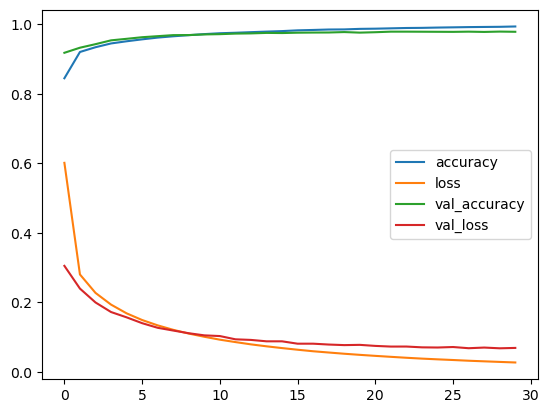

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0692


[0.0692470595240593, 0.9787999987602234]

In [44]:
X_new = X_test[:3]

In [45]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

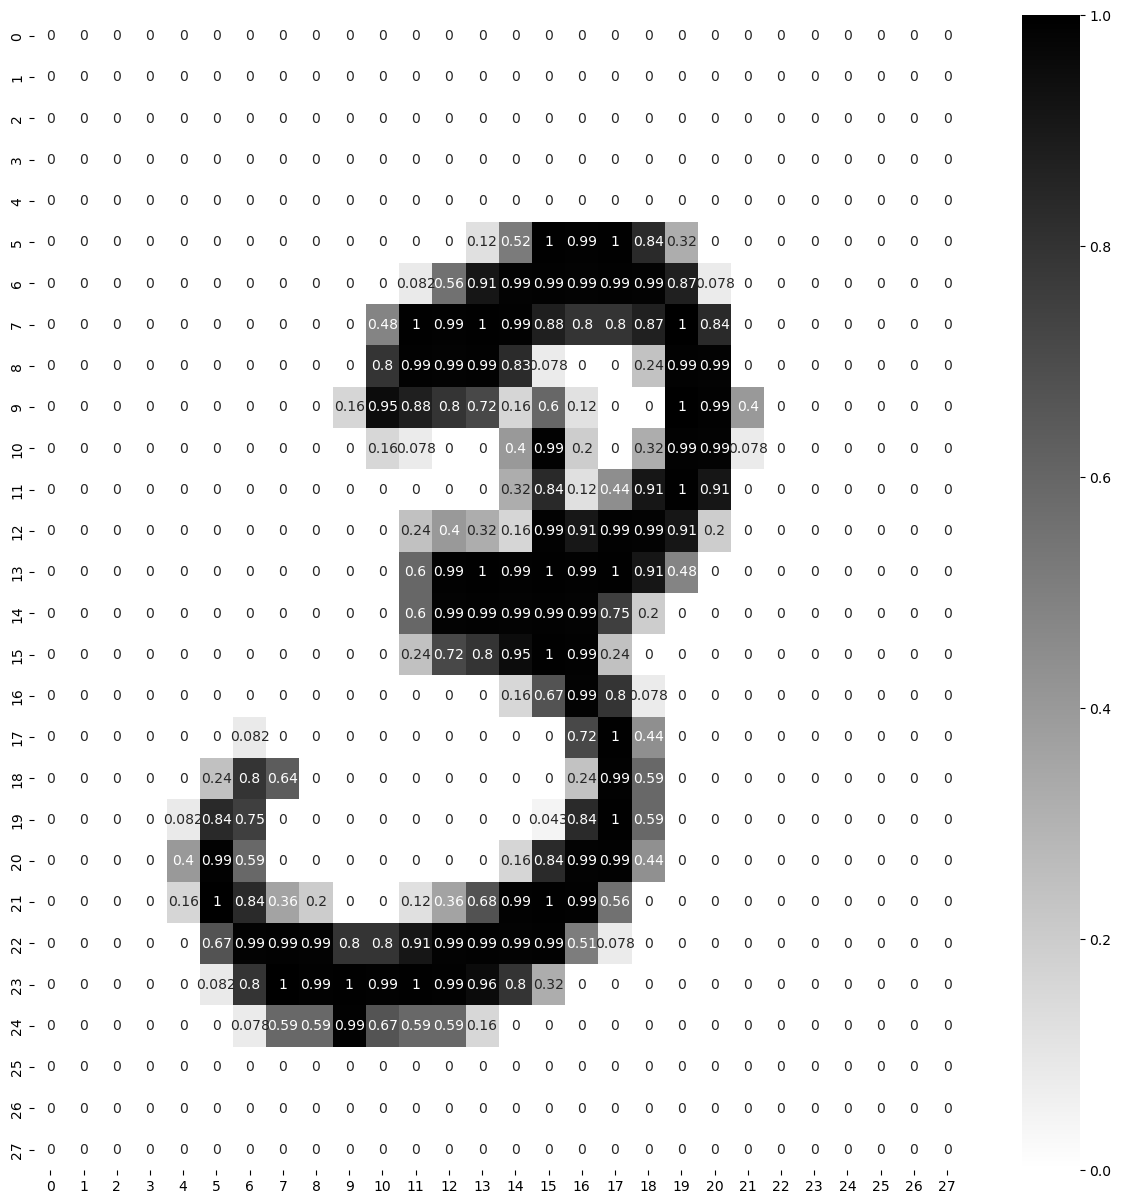

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1],annot=True,cmap="binary")

In [48]:
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [50]:
y_prob

array([[2.88810566e-06, 2.28798065e-08, 1.13462784e-05, 1.04884530e-04,
        2.78885426e-09, 4.25103508e-07, 1.36238043e-11, 9.99863267e-01,
        6.12002850e-06, 1.09979865e-05],
       [2.87035249e-07, 1.87716869e-05, 9.99924421e-01, 5.55421830e-05,
        1.71413393e-13, 3.93612964e-08, 4.95961899e-07, 8.36908407e-12,
        3.96152387e-07, 6.84621114e-15],
       [3.04305104e-06, 9.97929931e-01, 1.21273573e-04, 2.70598412e-05,
        2.93155172e-04, 5.67898787e-05, 1.76851114e-04, 6.32514595e-04,
        7.52097985e-04, 7.34042487e-06]], dtype=float32)

In [51]:
y_pred = np.argmax(y_prob, axis=-1)

In [52]:
y_pred

array([7, 2, 1])

In [53]:
actual

array([7, 2, 1], dtype=uint8)

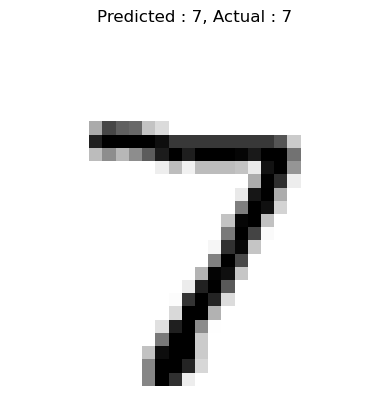

#########################


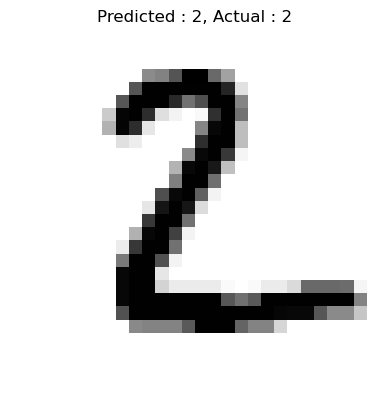

#########################


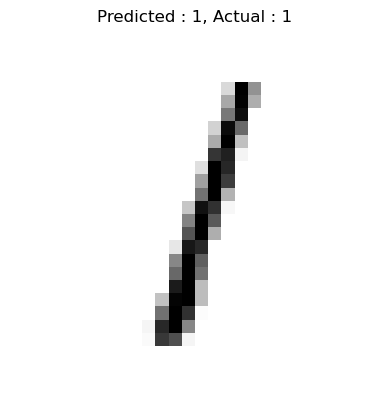

#########################


In [55]:
# plot 

for data,pred,actual_data in zip(X_new,y_pred,actual):
    plt.imshow(data,cmap="binary")
    plt.title(f"Predicted : {pred}, Actual : {actual_data}")
    plt.axis('off')
    plt.show()
    print("#########################")